# This is some text

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os, urllib, zipfile

Download the data.

In [10]:
directory = "datadir"
ncboeDir = "https://s3.amazonaws.com/dl.ncsbe.gov/data/ncvoter68.zip"

if not os.path.exists(directory):
    os.makedirs(directory)
    os.chdir(directory)
    urllib.urlretrieve(ncboeDir, 'ncvoter68.zip')



In [16]:
zip_ref = zipfile.ZipFile('ncvoter68.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [27]:
data = pd.read_csv('ncvoter68.txt', sep='\t')

In [21]:
print(data.shape)

(128229, 71)


In [28]:
data.head()

,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,...,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,age,ncid,vtd_abbrv,vtd_desc
0,68,ORANGE,271053,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,A-MUHAMMAD-EL,...,NaN,15B,15B PROSECUTORIAL,,,N,Age 41 - 65,DE255050,CG,CG
1,68,ORANGE,226774,I,INACTIVE,IU,CONFIRMATION RETURNED UNDELIVERABLE,,,AARHUS,...,HILLSBOROUGH,15B,15B PROSECUTORIAL,,,N,Age 26 - 40,DE222131,GB,GB
2,68,ORANGE,258913,R,REMOVED,RL,MOVED FROM COUNTY,,,AAROE,...,NaN,NaN,NaN,,,N,Age 18 - 25,BY517706,NaN,NaN
3,68,ORANGE,152488,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,AARON,...,CHAPEL HILL,15B,15B PROSECUTORIAL,,,N,Age 26 - 40,DE151771,CC,CC
4,68,ORANGE,216701,A,ACTIVE,AV,VERIFIED,,,AARON,...,NaN,15B,15B PROSECUTORIAL,,,N,Age 41 - 65,DE212058,CS1,CS1


In [43]:
data.groupby('precinct_abbrv').birth_age.describe(include = all)

precinct_abbrv       
BC              count    2050.000000
                mean       44.615610
                std        18.210326
                min        17.000000
                25%        29.000000
                50%        40.000000
                75%        58.750000
                max       101.000000
BP              count    1074.000000
                mean       43.952514
                std        18.668107
                min        17.000000
                25%        28.000000
                50%        39.000000
                75%        59.000000
                max        94.000000
CA              count    1094.000000
                mean       49.250457
                std        17.401017
                min        17.000000
                25%        35.000000
                50%        50.000000
                75%        63.000000
                max       100.000000
CB              count    1768.000000
                mean       42.300339
                

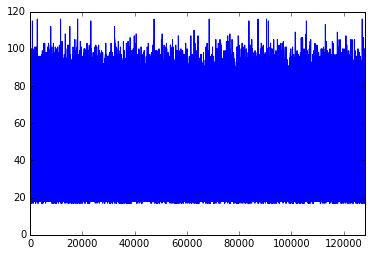

In [41]:
%matplotlib inline

plot_df = data.birth_age

plot_df.plot()
